## Exploitation des données météorologiques issues des stations MétéoFrance

In [2]:
#importation des librairies
!pip install pandas
import pandas as pd

In [5]:
#importation des données
D = pd.read_csv("MareVieillePlace.csv",sep=";")
D

POSTE      DATE    RR QRR    TM QTM  UM  QUM  GLOT  QGLOT
0     97421210  20110101   0,0   v  21,1   v NaN  NaN   NaN    NaN
1     97421210  20110102   0,0   v  21,2   v NaN  NaN   NaN    NaN
2     97421210  20110103   3,0   v  20,7   v NaN  NaN   NaN    NaN
3     97421210  20110104   0,0   v  19,8   v NaN  NaN   NaN    NaN
4     97421210  20110105  25,0   e  19,9   v NaN  NaN   NaN    NaN
...        ...       ...   ...  ..   ...  ..  ..  ...   ...    ...
3648  97421210  20201227   1,0   v  21,4   v NaN  NaN   NaN    NaN
3649  97421210  20201228   1,2   v  20,5   v NaN  NaN   NaN    NaN
3650  97421210  20201229   1,4   v  20,2   v NaN  NaN   NaN    NaN
3651  97421210  20201230   0,0   v  20,4   v NaN  NaN   NaN    NaN
3652  97421210  20201231   4,4   v  20,0   v NaN  NaN   NaN    NaN

[3653 rows x 10 columns]

On va par exemple étudier les précipitations (RR)

In [6]:
prec = D["RR"]
prec = prec.str.replace(",",".")
prec = prec.apply(lambda x: float(x))
prec

0        0.0
1        0.0
2        3.0
3        0.0
4       25.0
        ... 
3648     1.0
3649     1.2
3650     1.4
3651     0.0
3652     4.4
Name: RR, Length: 3653, dtype: float64

<AxesSubplot:>

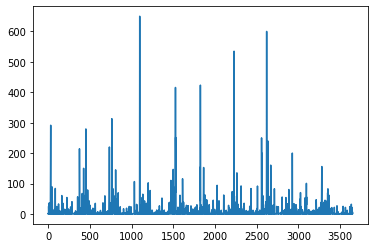

In [7]:
prec.plot()

In [13]:
date = pd.DatetimeIndex(pd.to_datetime(D["DATE"],format="%Y%m%d")) #conversion en date des données date et mise au format format
prec.index = date

ValueError: Length mismatch: Expected axis has 3650 elements, new values have 3653 elements

In [15]:
prec

DATE
2011-01-01     0.0
2011-01-02     0.0
2011-01-03     3.0
2011-01-04     0.0
2011-01-05    25.0
              ... 
2020-12-27     1.0
2020-12-28     1.2
2020-12-29     1.4
2020-12-30     0.0
2020-12-31     4.4
Name: RR, Length: 3650, dtype: float64

On a ainsi une série temporelle des précipitation de chaque jour.

On veut ensuite créer une année type.
Pour cela , on somme tous les mois (et non pas moyenne, car les précipitations ça se somme)


In [10]:
prec = prec[~((prec.index.month == 2) & (prec.index.day == 29))] #on supprime tous les 29 févriers
prec

DATE
2011-01-01     0.0
2011-01-02     0.0
2011-01-03     3.0
2011-01-04     0.0
2011-01-05    25.0
              ... 
2020-12-27     1.0
2020-12-28     1.2
2020-12-29     1.4
2020-12-30     0.0
2020-12-31     4.4
Name: RR, Length: 3650, dtype: float64

In [11]:
p = prec.resample("m").sum()
#p = p[~((p.index.month == 2) & (p.index.day == 29))] #pour éviter des problèmes plus loin, on supprime tous les données des 29 février
#en fait non, pas nécessaire
p

DATE
2011-01-31    831.4
2011-02-28    403.2
2011-03-31    151.2
2011-04-30    123.4
2011-05-31     82.4
              ...  
2020-08-31     24.4
2020-09-30     37.1
2020-10-31     54.7
2020-11-30     34.6
2020-12-31    143.2
Freq: M, Name: RR, Length: 120, dtype: float64

<AxesSubplot:xlabel='DATE'>

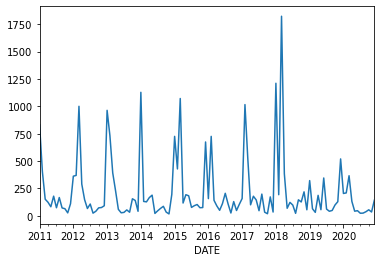

In [16]:
p.plot()

<AxesSubplot:xlabel='DATE'>

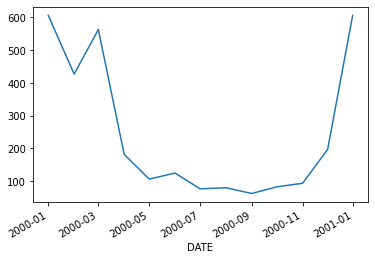

In [17]:
typ = p.groupby([p.index.month]).mean() #typ est l'année type (moyenne de tous les janviers, etc)
typ.index = pd.to_datetime('2000-' + typ.index.astype(int).astype(str) + '-1', format = '%Y-%m') #on se place arbitrairement à l'année 2000


#On ajoute un 31 décembre égal au premier janvier, pour avoir une année complète
typ["2000-12-31"] = typ["2000-01-01"]
typ.index = pd.to_datetime(typ.index)
typ.plot()

<AxesSubplot:xlabel='DATE'>

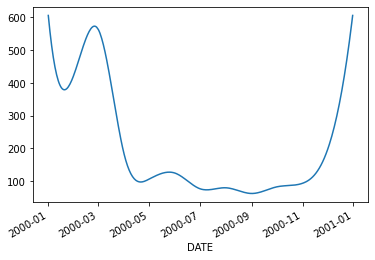

In [18]:
#On interpole ensuite cette série pour avoir une donnée par jour, grâce à une interpolation.
an = typ.resample("D").interpolate(method="cubic")
an = an[~((an.index.month == 2) & (an.index.day == 29))]
an.plot()

Le problème est que les données sont en mm/mois sur chaque jour (car on a sommé sur un mois). Une des solutions est alors de diviser toutes les valeurs par le nombre moyen de jour par mois, soit 365/12. On perd évidemment en précision, mais cette courbe étant une estimation et manquant déjà de pertinence sur plusieurs aspects, cette estimation supplémentaire n'est pas problèmatique.

<AxesSubplot:xlabel='DATE'>

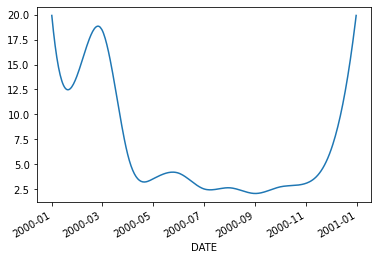

In [19]:
an = an*12/365
an.plot()

On a désormais une belle donnée exploitable pour la suite.

On exporte ensuite le fichier final pour pouvoir l'exploiter dans d'autres codes

In [20]:
an.to_csv(r'C:\Users\nicol\OneDrive\Bureau\JUPYTER\Donnees\Traitees\MareVieillePlace_RR.csv')


In [2]:
an

NameError: name 'an' is not defined

In [1]:
an.mean()

NameError: name 'an' is not defined